In [40]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
#from scipy import stats
#rom scipy.stats import zscore
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import warnings # handle warning messages
warnings.filterwarnings('ignore') # Ignore warning messages

In [18]:
athlete_df=pd.read_csv('athlete_events.csv')
noc=pd.read_csv("noc_regions.csv")

In [19]:
athlete_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [20]:
noc.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [21]:
#merging both the datasets
df=pd.merge(athlete_df,noc,on='NOC',how='left')
df

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  \
0          Basketball               Basketball Men's Basketball   NaN   
1                Judo              Judo Men's Extra-Lightweight   NaN   
2            Football                   Football Men's Football   NaN   
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold   
4       Speed Skating          Speed Skating Women's 500 metres   NaN   
...               ...                                       ...   ...   
271111           Luge                Luge Mixed (Men)'s Doubles   NaN   
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN   
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN   
271114      Bobsleigh                      Bobsleigh Men's Four   NaN   
271115      Bobsleigh                      Bobsleigh Men's Four   NaN   

             region notes  
0             China   NaN  
1             China   NaN  
2           Denmark   NaN  
3           Denmark   NaN  
4       Netherlands   NaN  
...             ...   ...  
271111       Poland   NaN  
271112       Poland   NaN  
271113       Poland   NaN  
271114       Poland   NaN  
271115       Poland   NaN  

[271116 rows x 17 columns]

In [22]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [23]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 1385


In [24]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [25]:
#Clean data and Remove NANs
print("Before imputation-Null Values\n",df.isna().sum())

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['Medal'].fillna('unknown', inplace=True)
df['notes'].fillna('unknown', inplace=True)
df['region'].fillna('unknown', inplace=True)
print("\nAfter imputation\n", df.isna().sum())
# round age
df["Age"] = df["Age"].round(0)
#fix this warning FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
df = df.replace([np.inf, -np.inf], np.nan)


Before imputation-Null Values
 ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
region       370
notes     264696
dtype: int64

After imputation
 ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
notes     0
dtype: int64


## Country analysis
This section contains analysis and visualizations that highlight the performance of each country in Olympics history

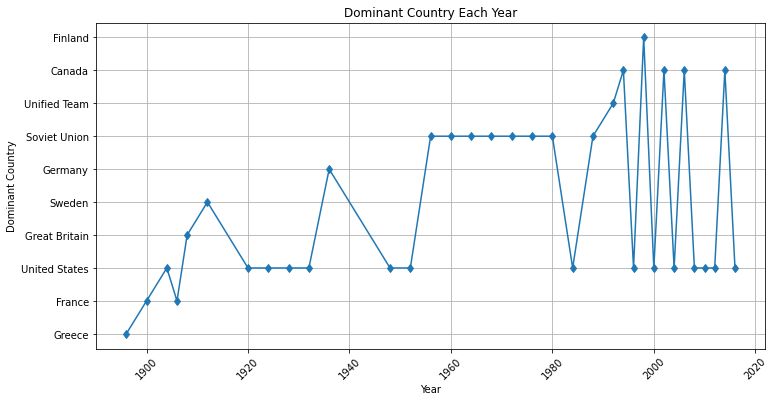

In [26]:
# Filter out 'unknown' values in the Medal column
df_medal = df[df['Medal'] != 'unknown']

# Group the data by year and country, and count the number of medals won
country_medals_year = df_medal.groupby(['Year', 'Team'])['Medal'].count()

# Find the dominant country for each year
dominant_country_year = country_medals_year.groupby('Year').idxmax().apply(lambda x: x[1])

# Plot the dominant country for each year
plt.figure(figsize=(12, 6))
plt.plot(dominant_country_year.index, dominant_country_year.values, marker='d', linestyle='-')
plt.title('Dominant Country Each Year')
plt.xlabel('Year')
plt.ylabel('Dominant Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

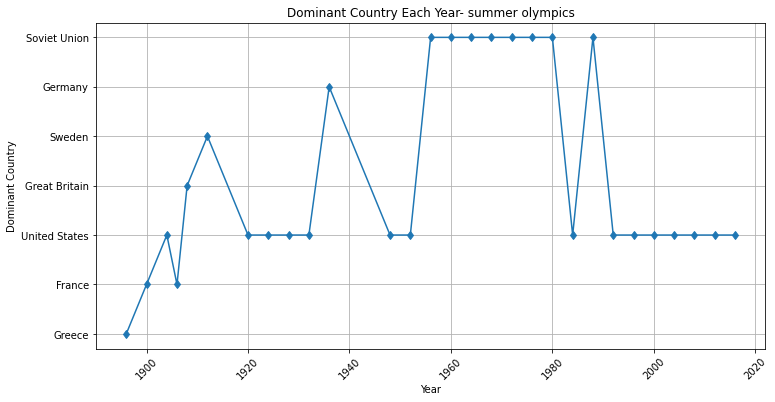

In [34]:
# Group the data by year and country, and count the number of medals won
country_medals_year_summer = df_medal[df_medal['Season']=='Summer']
country_medals_year_summer = country_medals_year_summer.groupby(['Year', 'Team'])['Medal'].count()

# Find the dominant country for each year
dominant_country_year = country_medals_year_summer.groupby('Year').idxmax().apply(lambda x: x[1])

# Plot the dominant country for each year
plt.figure(figsize=(12, 6))
plt.plot(dominant_country_year.index, dominant_country_year.values, marker='d', linestyle='-')
plt.title('Dominant Country Each Year- summer olympics')
plt.xlabel('Year')
plt.ylabel('Dominant Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

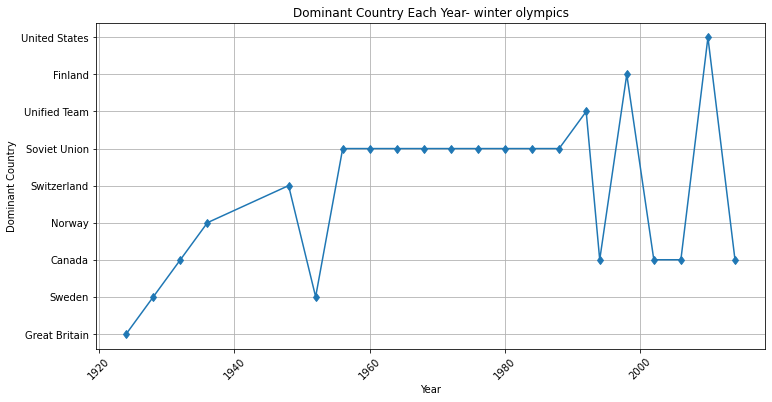

In [37]:
# Group the data by year and country, and count the number of medals won
country_medals_year_winter = df_medal[df_medal['Season']=='Winter']
country_medals_year_winter = country_medals_year_winter.groupby(['Year', 'Team'])['Medal'].count()

# Find the dominant country for each year
dominant_country_year = country_medals_year_winter.groupby('Year').idxmax().apply(lambda x: x[1])

# Plot the dominant country for each year
plt.figure(figsize=(12, 6))
plt.plot(dominant_country_year.index, dominant_country_year.values, marker='d', linestyle='-')
plt.title('Dominant Country Each Year- winter olympics')
plt.xlabel('Year')
plt.ylabel('Dominant Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

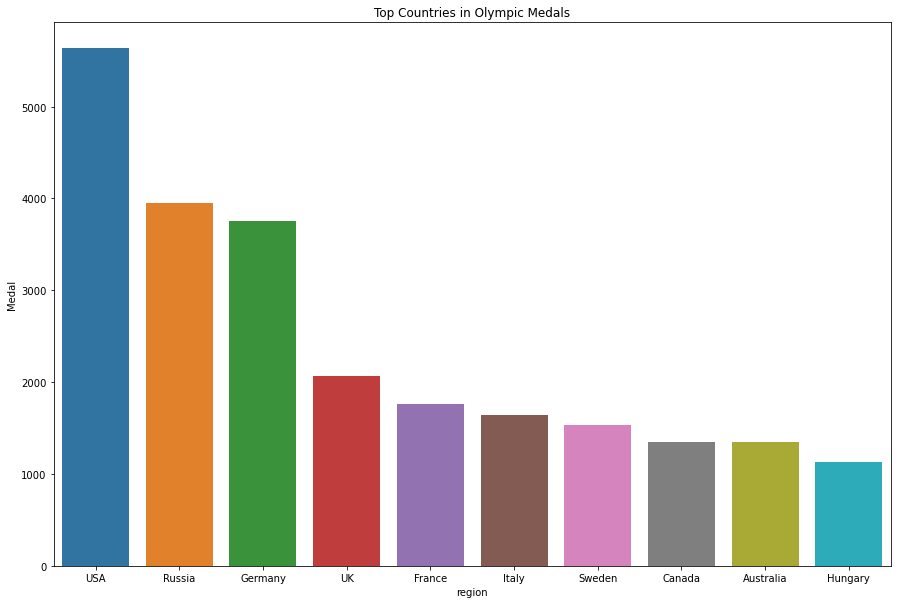

In [11]:
plt.figure(figsize=(15, 10))
topc=df.groupby('region')['Medal'].count().nlargest(10).reset_index()
sns.barplot(x='region',y='Medal',data=topc)
plt.title('Top Countries in Olympic Medals')
plt.show()

In [49]:
df_medal_summer =df_medal[(df_medal['Season'] == 'Summer')]
df_medal_winter = df_medal[(df_medal['Season'] == 'Winter')]

top_countries_summer = df_medal_summer.dropna(subset=["Medal"])
top_countries_summer = top_countries_summer.region.value_counts().reset_index().head(100).merge(df,left_on="index",right_on="region",how="left")\
                        [["index","region_x"]].drop_duplicates("index")
top_countries_summer.rename(columns={"index":"region","region_x":"Medals"},inplace=True)


top_countries_winter = df_medal_winter.dropna(subset=["Medal"])

top_countries_winter.rename(columns={"index":"region","region_x":"Medals"},inplace=True)
top_countries_winter = top_countries_winter.region.value_counts().reset_index().head(100).merge(df,left_on="index",right_on="region",how="left")\
                        [["index","region_x"]].drop_duplicates("index")

In [46]:
pio.templates.default = "plotly"
world_map = go.Figure(go.Choropleth(
    locations = top_countries_summer['region'],
    z = top_countries_summer['Medals'],
    locationmode = 'country names',
    colorscale = 'Greens',
    colorbar_title = 'Total',
))

world_map.update_layout(
    title_text = 'Total number of medals won by countries in summer olympics',
    geo=dict(
        showcoastlines=True,
        showland=True,
        showframe=False,
        projection_type='equirectangular'
    )
)
world_map.show()

In [50]:
pio.templates.default = "plotly"
world_map = go.Figure(go.Choropleth(
    locations = top_countries_winter['index'],
    z = top_countries_summer['Medals'],
    locationmode = 'country names',
    colorscale = 'Blues',
    colorbar_title = 'Total',
))

world_map.update_layout(
    title_text = 'Total number of medals won by countires in winter olympics',
    geo=dict(
        showcoastlines=True,
        showland=True,
        showframe=False,
        projection_type='equirectangular'
    )
)
world_map.show()

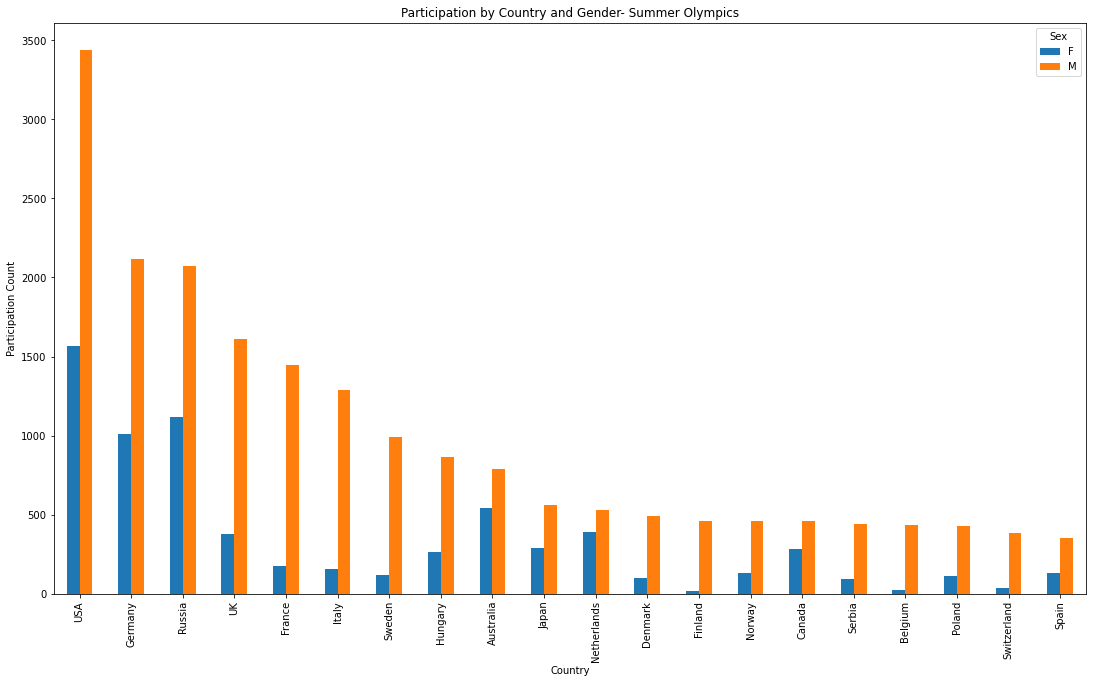

In [14]:
c_participation = df[df['Season'] == 'Summer'].groupby(['region', 'Sex'])['Name'].count().reset_index()
c_participation = c_participation.pivot(index='region', columns='Sex', values='Name').fillna(0).sort_values(by='M', ascending=False).head(20)
c_participation.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Participation Count')
plt.title('Participation by Country and Gender- Summer Olympics')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

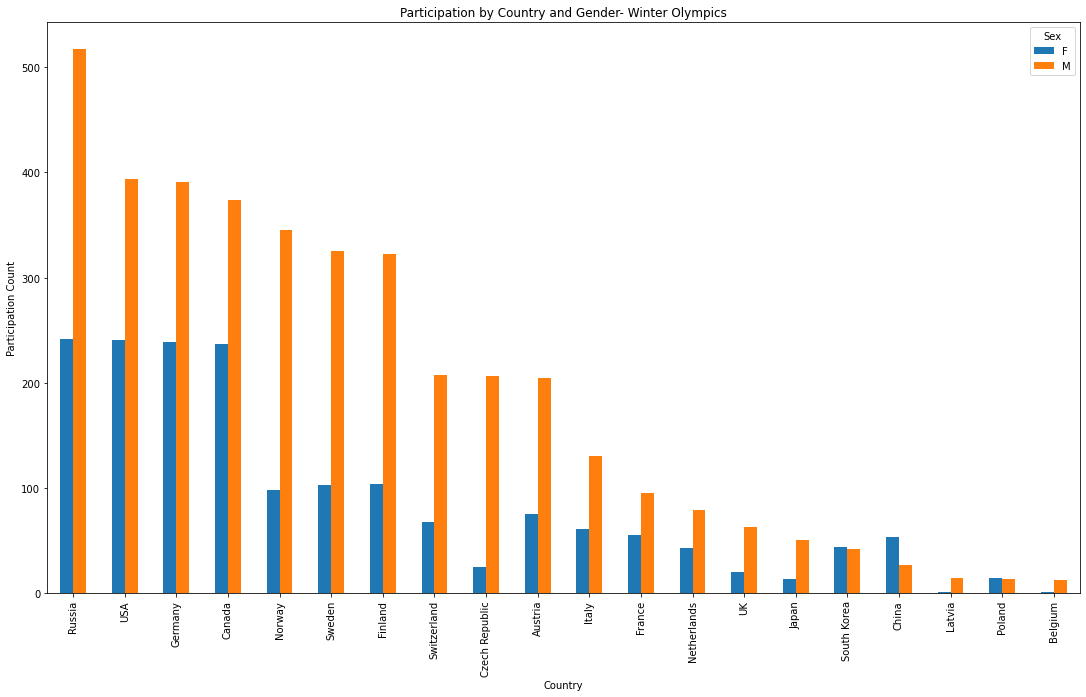

In [15]:
c_participation = df[df['Season'] == 'Winter'].groupby(['region', 'Sex'])['Name'].count().reset_index()
c_participation = c_participation.pivot(index='region', columns='Sex', values='Name').fillna(0).sort_values(by='M', ascending=False).head(20)
c_participation.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Participation Count')
plt.title('Participation by Country and Gender- Winter Olympics')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

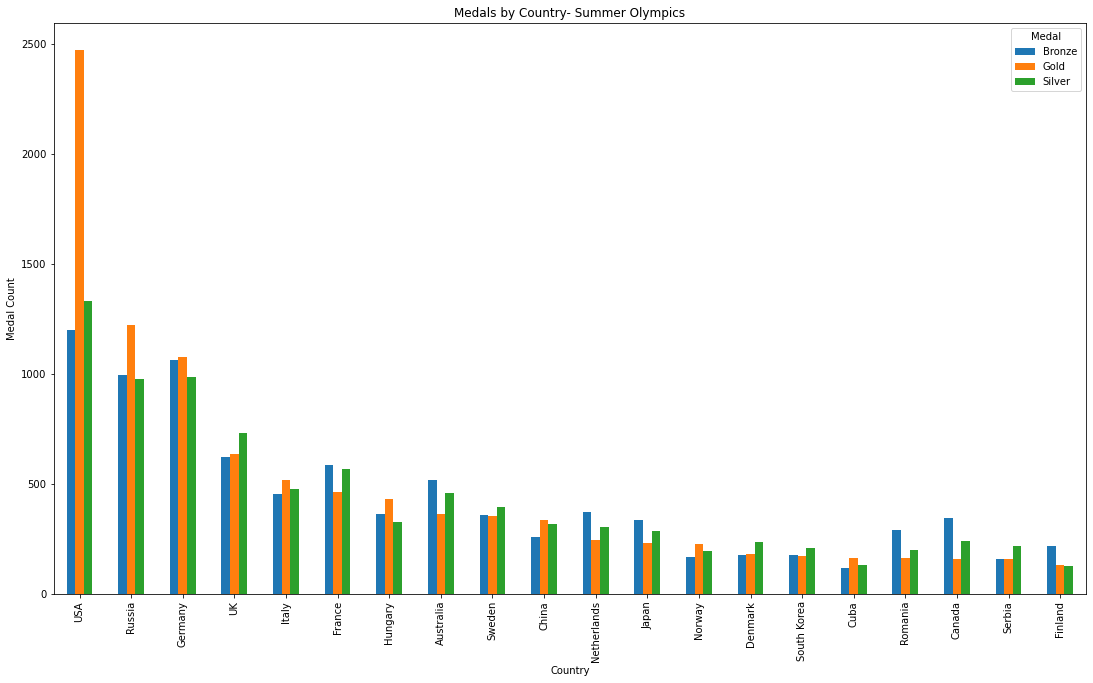

In [16]:
c_medal = df[df['Season'] == 'Summer'].groupby(['region', 'Medal'])['Sex'].count().reset_index()
c_medal = c_medal.pivot(index='region', columns='Medal', values='Sex').fillna(0).sort_values(by='Gold', ascending=False).head(20)
c_medal.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.title('Medals by Country- Summer Olympics')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

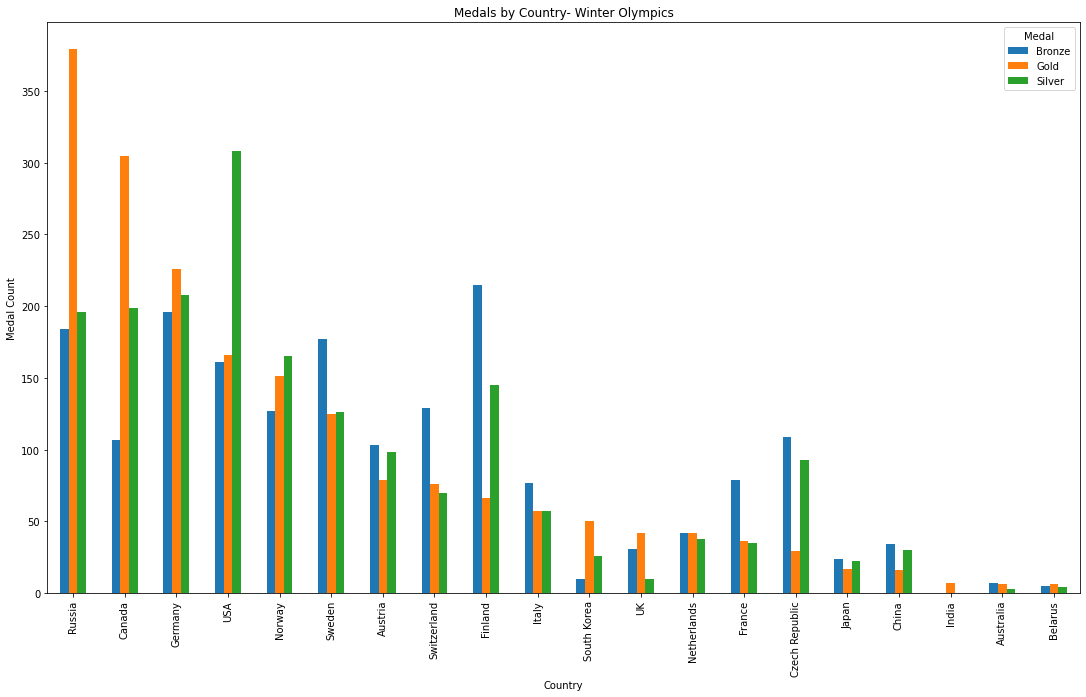

In [17]:
c_medal = df[df['Season'] == 'Winter'].groupby(['region', 'Medal'])['Sex'].count().reset_index()
c_medal = c_medal.pivot(index='region', columns='Medal', values='Sex').fillna(0).sort_values(by='Gold', ascending=False).head(20)
c_medal.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.title('Medals by Country- Winter Olympics')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Text(0.5, 1.0, 'Age of male vs female atheletes')

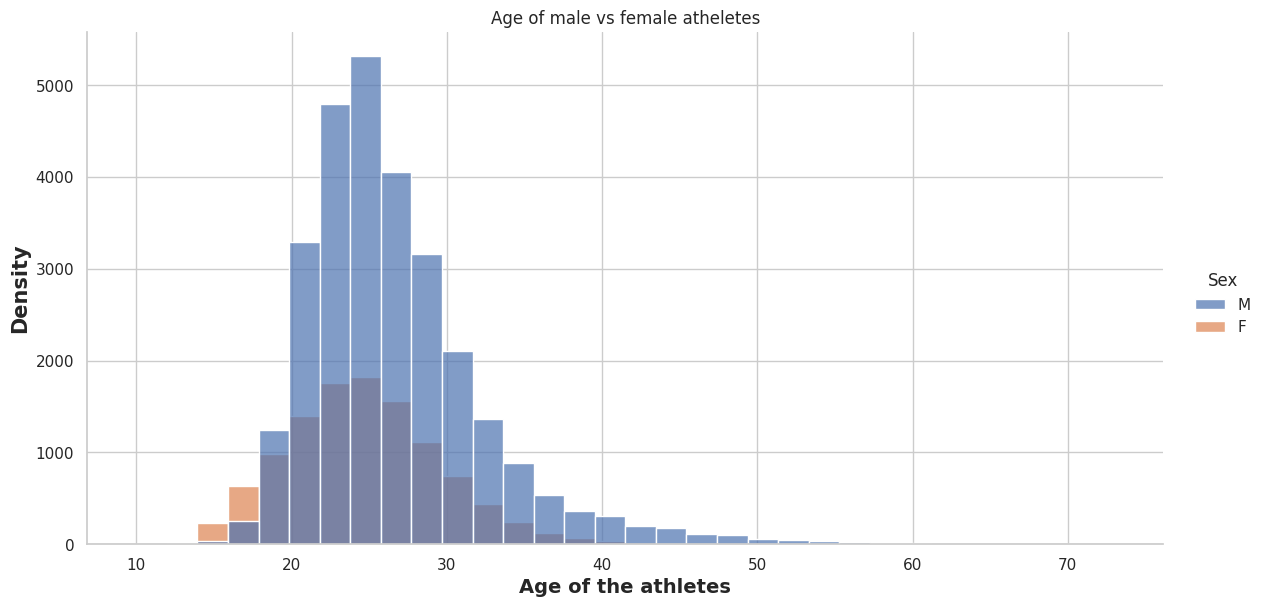

In [104]:
sns.set(style='whitegrid',)
sns.displot(df, x="Age", hue="Sex",alpha=0.7,binwidth=2,height=6, aspect=2)
plt.xlabel("Age of the athletes",fontsize=14, weight="semibold")
plt.ylabel("Density",fontsize=15, weight="bold")
plt.title('Age of male vs female atheletes')

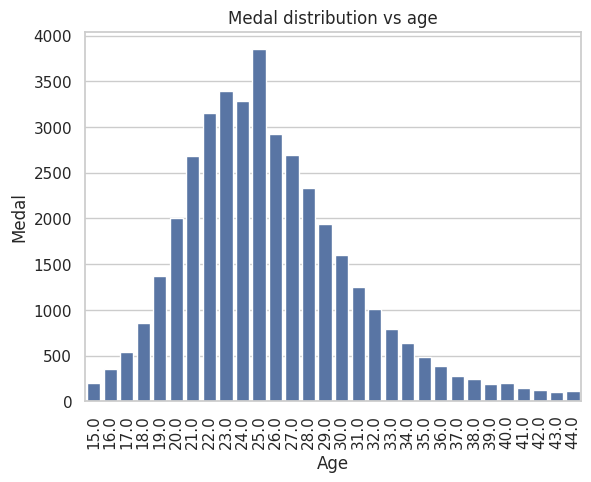

In [105]:
df_noc_medal = df.groupby("Age")["Medal"].count().sort_values(ascending = False).head(30).reset_index()
sns.barplot(data=df_noc_medal, x = "Age", y = "Medal")
plt.xticks(rotation = 90)
plt.title('Medal distribution vs age')
plt.show()

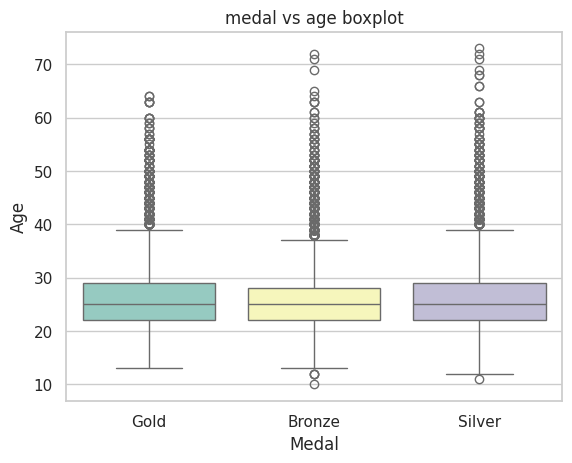

In [106]:
#medal vs age boxplot
df_noc_medal = df.groupby("Age")["Medal"].count().sort_values(
    ascending = False).reset_index()

sns.boxplot(data=df, x = 'Medal', y = "Age",  orient="v", palette="Set3")
plt.title('medal vs age boxplot')
plt.show()

In [52]:
men= df[(df.Sex == "M")]
women = df[(df.Sex == "F")]

Text(0.5, 1.0, 'Variation of Weight(pounds) for Men Athletes over time')

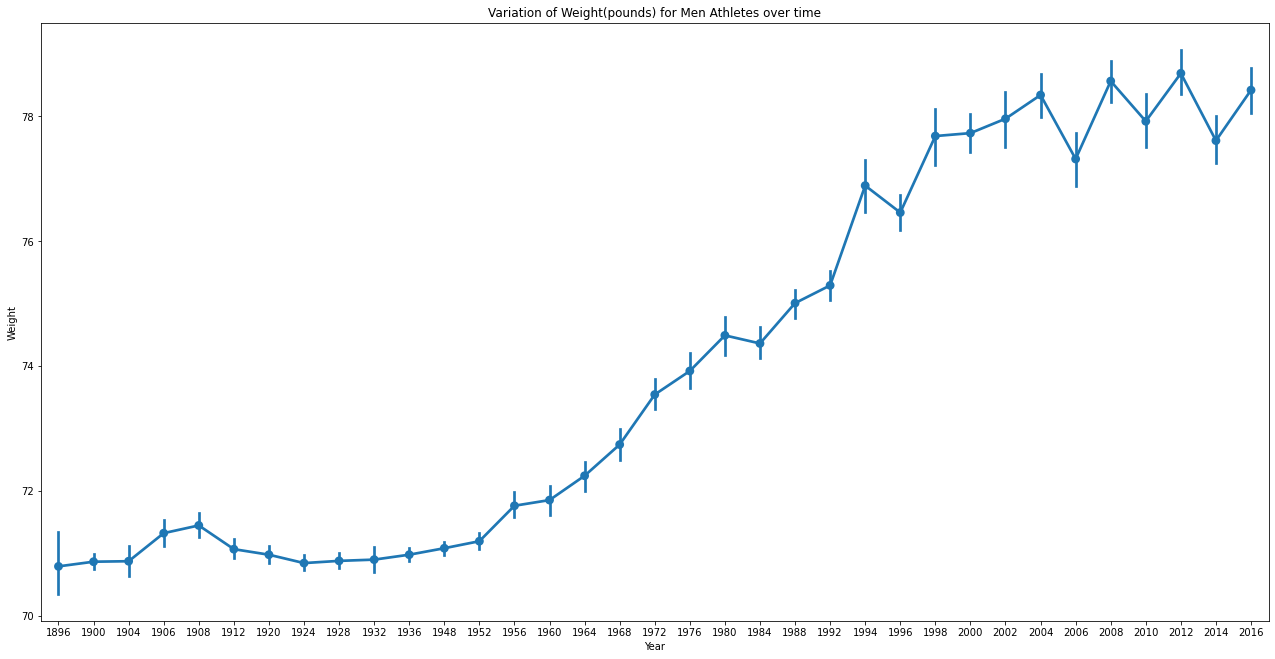

In [53]:
#men's weight
plt.figure(figsize=(22, 11))
sns.pointplot(x = 'Year',y =  'Weight', data=men)
plt.title('Variation of Weight(pounds) for Men Athletes over time')

Text(0.5, 1.0, 'Variation of Weight(pounds) for Female Athletes over time')

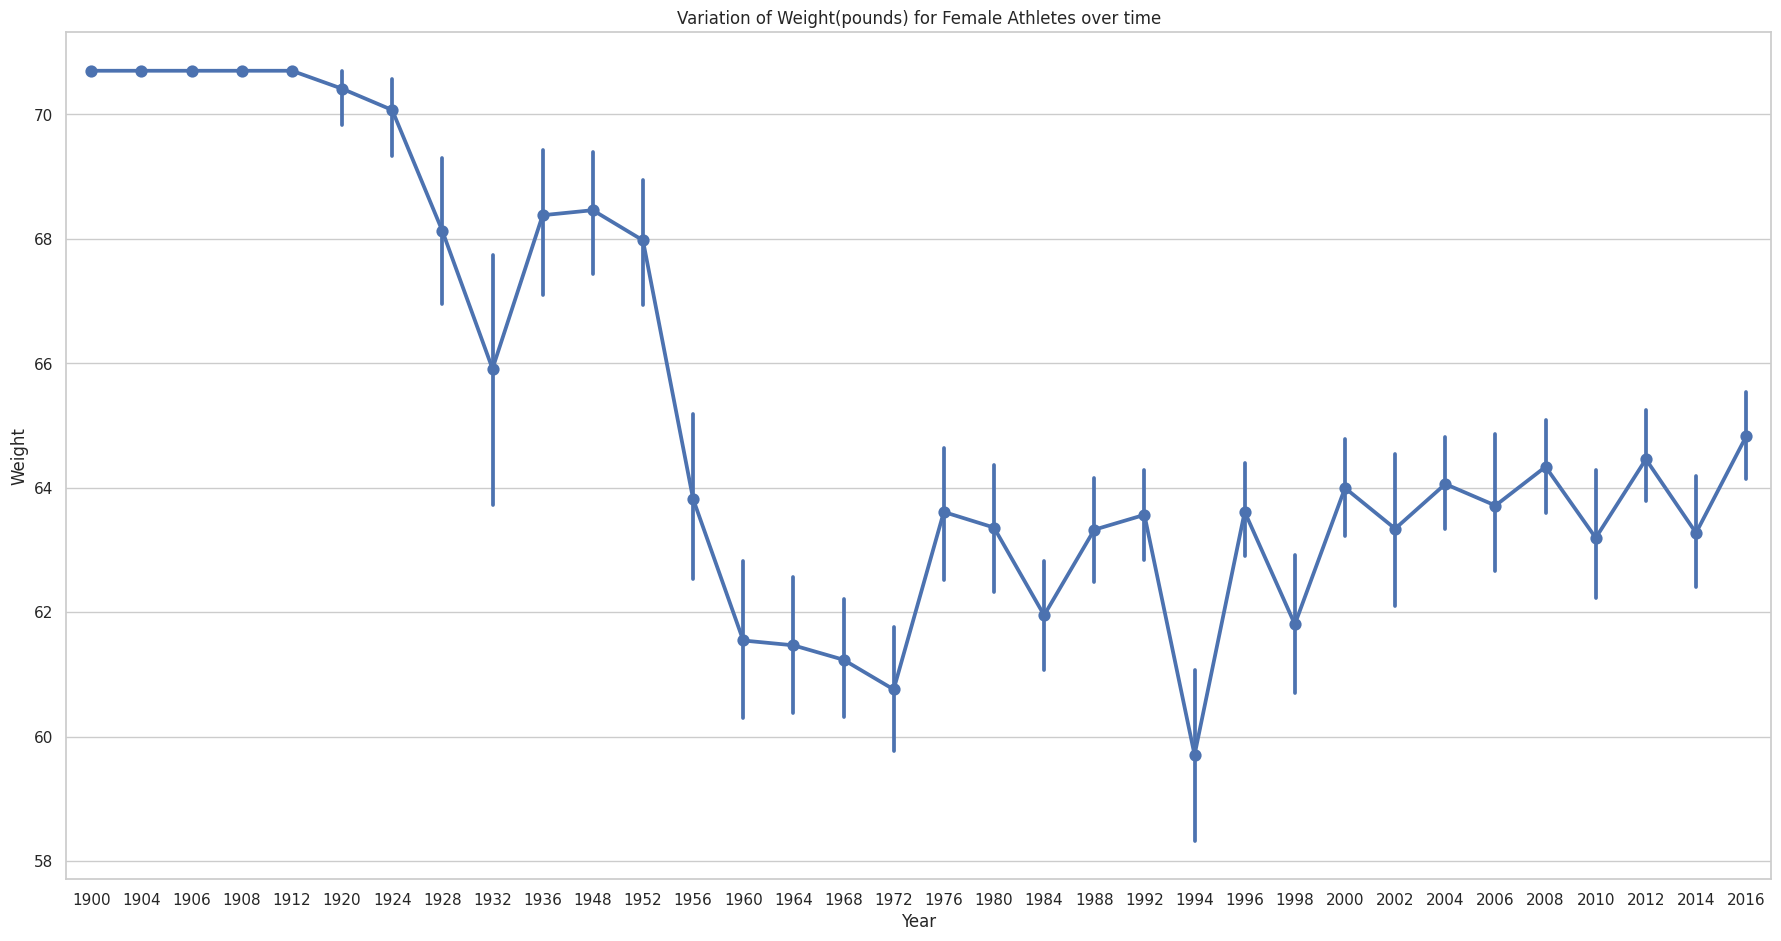

In [129]:
#women's weight
plt.figure(figsize=(22, 11))
sns.pointplot(x = 'Year',y =  'Weight', data=women)
plt.title('Variation of Weight(pounds) for Female Athletes over time')

Text(0.5, 1.0, 'Variation of Height(cm) for Male Athletes over time')

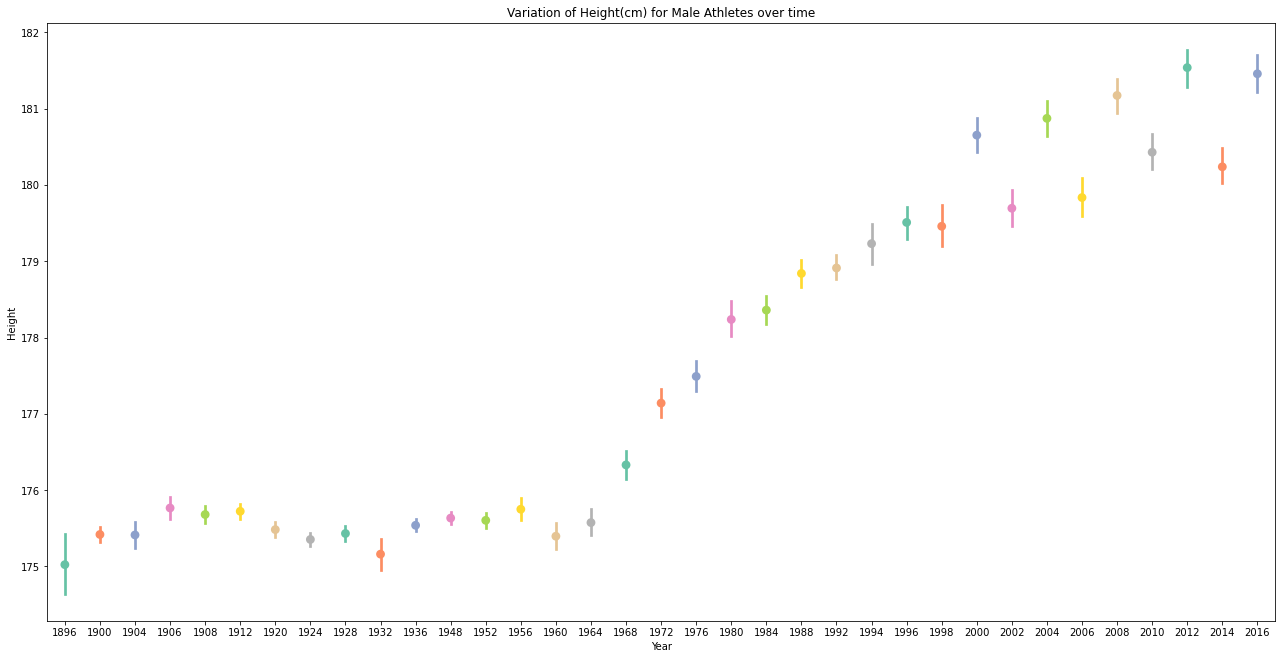

In [56]:
#men's heights
plt.figure(figsize=(22, 11))
sns.pointplot(x = 'Year', y ='Height', data=men, palette='Set2')
plt.title('Variation of Height(cm) for Male Athletes over time')

Text(0.5, 1.0, 'Height Distribution- Men')

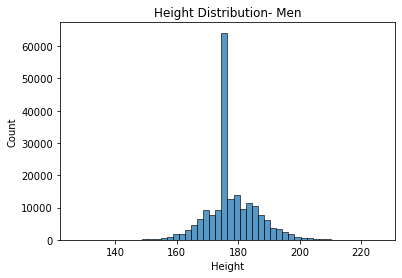

In [54]:
#Height distribution- men
height_dist = sns.histplot(data=men, x='Height', bins=50)
height_dist.set_title('Height Distribution- Men')

Text(0.5, 1.0, 'Variation of Height(cm) for Female Athletes over time')

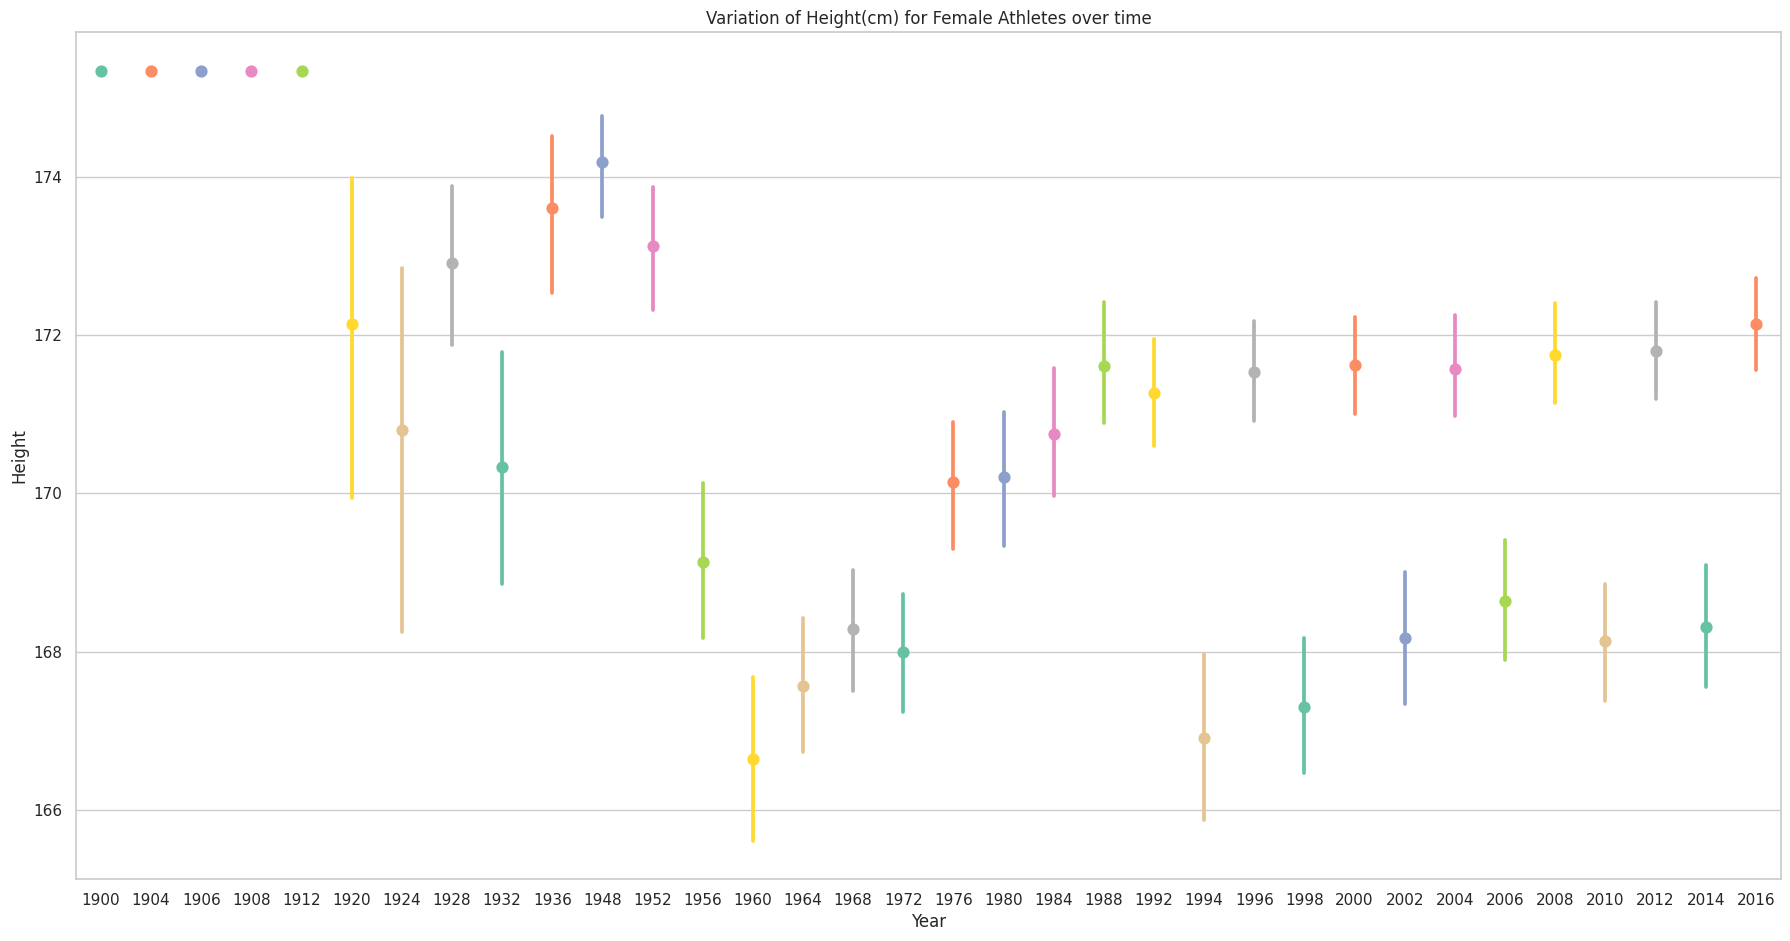

In [131]:
#women's height
plt.figure(figsize=(22, 11))
sns.pointplot(x = 'Year', y = 'Height', data=women, palette='Set2')
plt.title('Variation of Height(cm) for Female Athletes over time')

Text(0.5, 1.0, 'Height Distribution- Women')

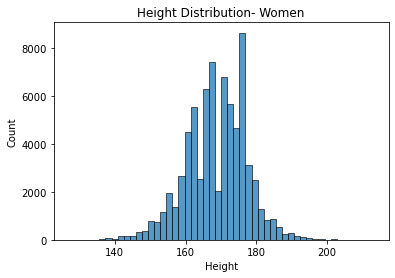

In [57]:
#Height distribution- women
height_dist = sns.histplot(data=women, x='Height', bins=50)
height_dist.set_title('Height Distribution- Women')

In [38]:
# Calculate the mean age, weight, and height for gold medalists in top 5 sports
def stats(df,sport):
    mean_age = df['Age'].mean()
    mean_weight = df['Weight'].mean()
    mean_height = df['Height'].mean()

    # Print the mean age, weight, and height for gold medalists
    print("Mean Age, Weight, and Height for Gold Medalists in",sport,":")
    print("Mean Age:", mean_age)
    print("Mean Weight:", mean_weight)
    print("Mean Height:", mean_height)
    print('\n')


gold_Athletics_df = df[(df['Sport'] == 'Athletics') & (df['Medal'] == 'Gold')]
gold_Swimming_df = df[(df['Sport'] == 'Swimming') & (df['Medal'] == 'Gold')]
gold_Rowing_df = df[(df['Sport'] == 'Rowing') & (df['Medal'] == 'Gold')]
gold_Gymnastics_df = df[(df['Sport'] == 'Gymnastics') & (df['Medal'] == 'Gold')]
gold_Fencing_df = df[(df['Sport'] == 'Fencing') & (df['Medal'] == 'Gold')]
stats(gold_Athletics_df,'Athletics')
stats(gold_Swimming_df,'Swimming')
stats(gold_Rowing_df,'Rowing')
stats(gold_Gymnastics_df,'Gymnastics')
stats(gold_Fencing_df,'Fencing')

Mean Age, Weight, and Height for Gold Medalists in Athletics :
Mean Age: 25.003734129947723
Mean Weight: 71.74756054443593
Mean Height: 177.83015309127222


Mean Age, Weight, and Height for Gold Medalists in Swimming :
Mean Age: 20.799818016378527
Mean Weight: 73.46226635111096
Mean Height: 180.74211859049518


Mean Age, Weight, and Height for Gold Medalists in Rowing :
Mean Age: 25.328220858895705
Mean Weight: 78.99726114634544
Mean Height: 182.65886056924208


Mean Age, Weight, and Height for Gold Medalists in Gymnastics :
Mean Age: 23.562579013906447
Mean Weight: 62.743751794438694
Mean Height: 167.87497783068713


Mean Age, Weight, and Height for Gold Medalists in Fencing :
Mean Age: 28.78787878787879
Mean Weight: 71.41866901679634
Mean Height: 176.925945425514




In [58]:
df_medal=df.loc[df.Medal!='unknown']
#Age of participants by year
fig = px.scatter(df_medal, x="Year", y="Age", color = 'Sex', trendline="ols", template='presentation', width=1000, height=500,title='Age of participants by year')
fig.show()

In [66]:
#Showing the exact values represented in the box plot
df['Age'].describe()

count    269731.000000
mean         25.439071
std           6.057070
min          10.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

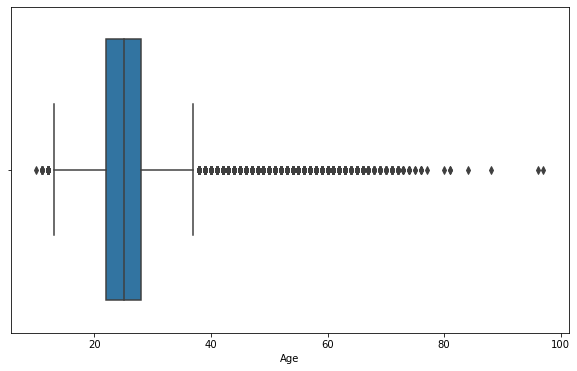

In [72]:
#detecting age outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.show()

In [68]:
#quartiles of age
q1 = 22.0
q3 = 28.0
iqr = q3 - q1
top_limit_value = q3 + 1.5*iqr
low_limit_value = q1 - 1.5*iqr
print("Top limit value:" ,top_limit_value)
print("Low limit value:", low_limit_value)

Top limit value: 37.0
Low limit value: 13.0


In [70]:
#athletes who are older than the top_limit_value by sport
older_athletes = df[df['Age'] > top_limit_value]
older_athletes['Sport'].value_counts().head(25)

Shooting                3178
Equestrianism           1997
Art Competitions        1311
Sailing                 1033
Fencing                 1031
Athletics                408
Archery                  311
Bobsleigh                230
Gymnastics               167
Rowing                   122
Cycling                   99
Curling                   98
Table Tennis              83
Cross Country Skiing      81
Biathlon                  78
Canoeing                  71
Tennis                    70
Ice Hockey                51
Wrestling                 46
Golf                      42
Weightlifting             42
Speed Skating             36
Polo                      33
Figure Skating            30
Handball                  29
Name: Sport, dtype: int64

In [71]:
#athletes who are younger than the low_limit_value by sport
youger_athletes = df[df['Age'] < low_limit_value]
youger_athletes['Sport'].value_counts()

Swimming          25
Figure Skating    15
Rowing             5
Gymnastics         5
Athletics          2
Diving             1
Name: Sport, dtype: int64

In [113]:
# Calculate the mean age, weight, and height for gold medalists
def stats(df, gender):
    mean_age = df['Age'].mean().round(0)
    mean_weight = df['Weight'].mean().round(0)
    mean_height = df['Height'].mean().round(0)

    # Print the mean age, weight, and height for gold medalists
    print("Mean Age, Weight, and Height for", gender)
    print("Mean Age:", mean_age)
    print("Mean Weight:", mean_weight)
    print("Mean Height:", mean_height)
    print('\n')


female_df = df[df['Sex'] == 'F']
male_df = df[(df['Sex'] == 'M')]
stats(female_df, "female")
stats(male_df, "male")

Mean Age, Weight, and Height for female
Mean Age: 25.0
Mean Weight: 64.0
Mean Height: 171.0


Mean Age, Weight, and Height for male
Mean Age: 26.0
Mean Weight: 77.0
Mean Height: 180.0




In [84]:
#Grouping the a'Age' data by 'Season' and 'Sex'
df.groupby(['Season', 'Sex'])[['Age']].agg(['min', 'max', 'mean'])

Age                 
             min   max       mean
Season Sex                       
Summer F    11.0  69.0  24.380110
       M    10.0  73.0  26.455206
Winter F    13.0  46.0  25.186637
       M    14.0  58.0  26.469619

<AxesSubplot:>

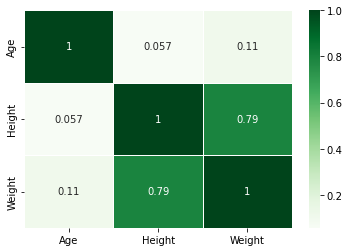

In [88]:
#Heat map of the correlation between 'Age', 'Height' and 'Weight'
sns.heatmap(df[['Age','Height','Weight']].corr(), annot=True, cmap='Greens',linewidths=0.5)

## Performance analysis

Analysing the performance and medal status of athletes

In [73]:
#Selecting only the text columns for a further analysis
text_columns = df.select_dtypes(include=['object'])
for column in text_columns.columns:
    if column != 'Name' and column != 'NOC':
        print(df[column].value_counts().head())
        print()

M    195353
F     74378
Name: Sex, dtype: int64

United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Name: Team, dtype: int64

2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
Name: Games, dtype: int64

Summer    221167
Winter     48564
Name: Season, dtype: int64

London            22297
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Name: City, dtype: int64

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10827
Name: Sport, dtype: int64

Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: Event, dtype: int64

unknown    229959
Gold        13369
Bronze      13295
Silver      13108
Name: Medal, dtype: int64

USA        18604
Germany    15787
Fra

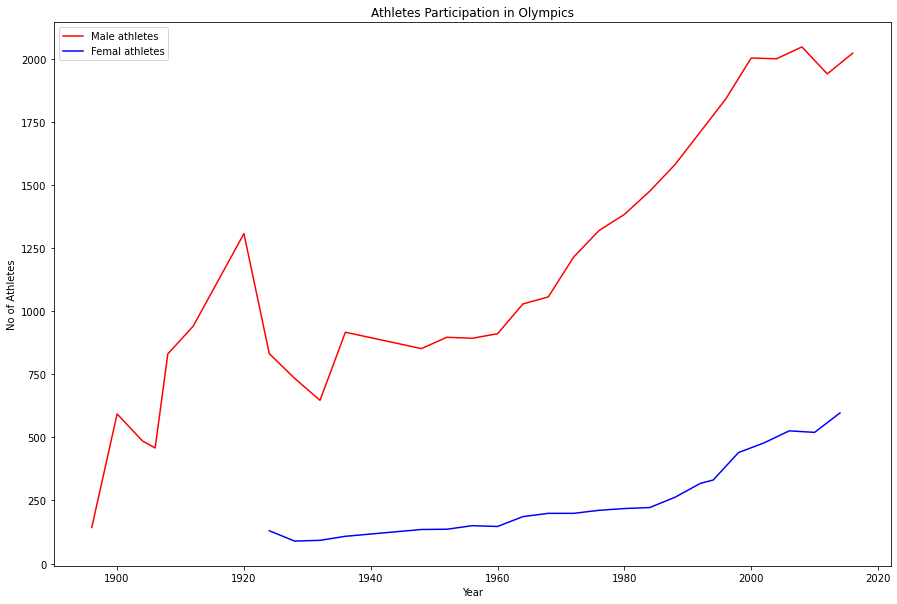

In [83]:
plt.figure(figsize=(15, 10))

ath_men = df[df['Sex'] == 'M'].groupby('Year')['ID'].count()
ath_woemn = df[df['Sex'] == 'F'].groupby('Year')['ID'].count()

plt.plot(ath_summer.index, ath_summer.values, label='Male athletes', color='red')
plt.plot(ath_winter.index, ath_winter.values, label='Femal athletes', color='blue')

plt.xlabel('Year')
plt.ylabel('No of Athletes')
plt.legend()
plt.title('Athletes Participation in Olympics')
plt.show()

In [74]:
# Percentage of athletes who win a medal
total_medal_given = 13372 + 13295 + 13116
total_athletes = 231333

medal_percentage = round((total_medal_given / total_athletes * 100),2)
medal_percentage

17.2

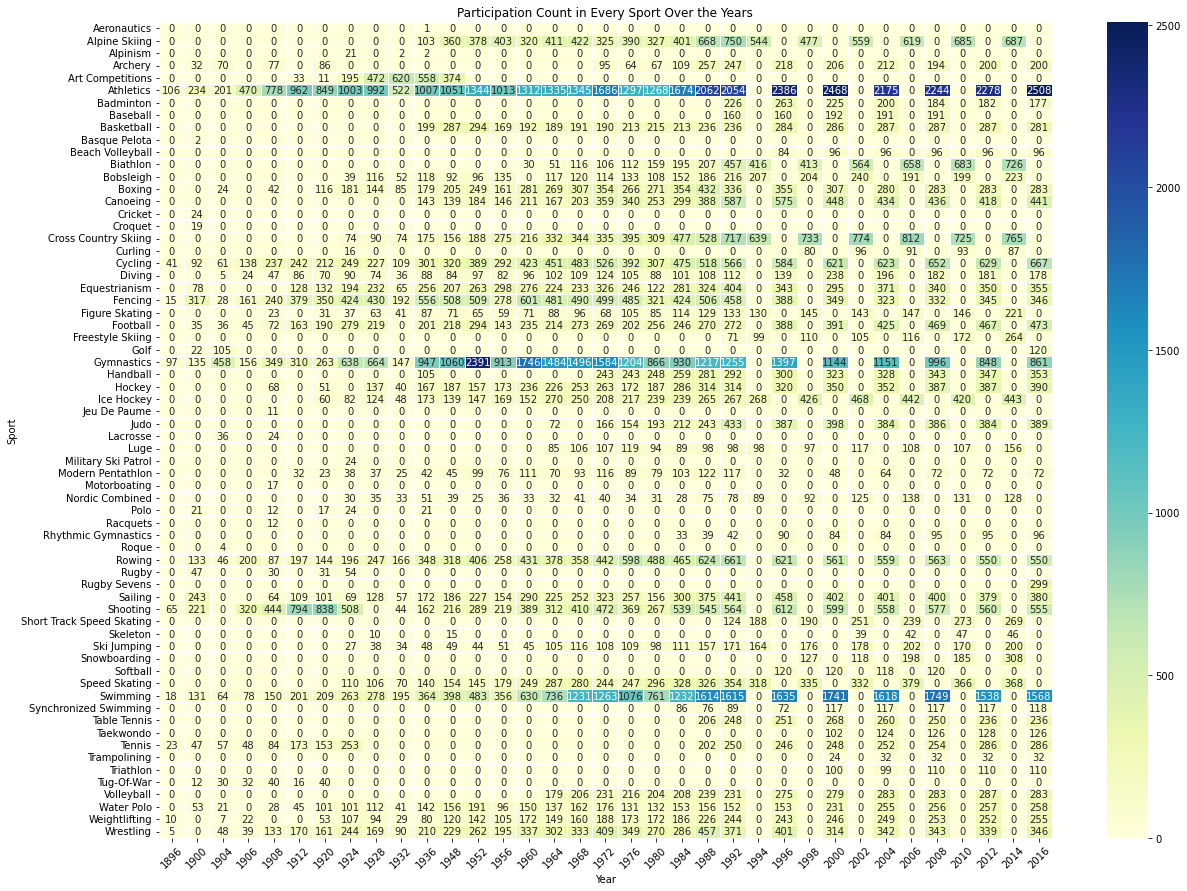

In [75]:
# Create a pivot table to calculate participation count for every sport over the years
pivot_table = df.pivot_table(index='Sport', columns='Year', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 15))  # Increase the figure size to accommodate more y-axis labels
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Participation Count in Every Sport Over the Years')
plt.xlabel('Year')
plt.ylabel('Sport')
plt.yticks(rotation=0)  # Rotate the y-axis labels to prevent overlap
plt.xticks(rotation=45)
plt.show()

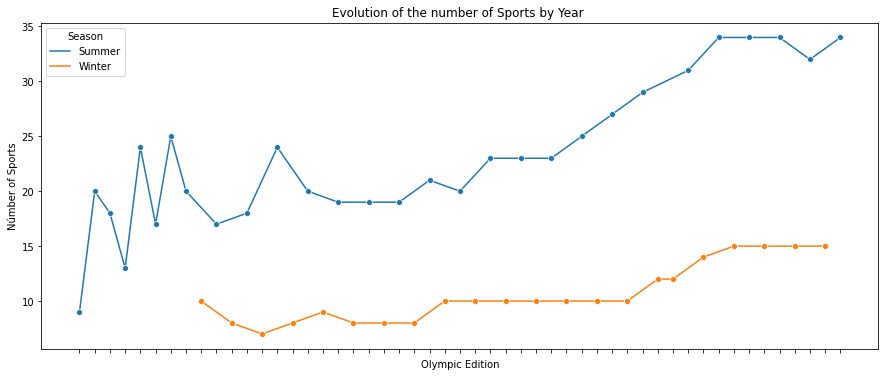

In [90]:
#Evolution of the number of 'Sports' throughout the Olyumpic Games editions
sport_number_evolution = df.groupby(['Games','Year','Season'])[['Sport', 'Event']].nunique()
#Lineplot of the evolution of the number of 'Sports' throughout history
plt.figure(figsize=(15, 6))
ax = sns.lineplot(data=sport_number_evolution, x="Games", y="Sport", hue='Season', marker="o")
plt.xlabel("Olympic Edition")
plt.ylabel("Númber of Sports")
plt.title("Evolution of the number of Sports by Year ")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

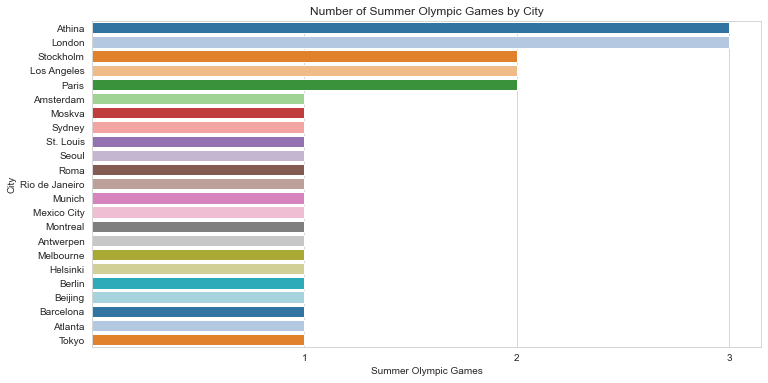

In [92]:
#Select only the summer olympic games data
summer_games_rows = df[df['Season'] == 'Summer']

#Select only the summer olympic games data
winter_games_rows = df[df['Season'] == 'Winter']

#Grouping the summer 'Games' data by 'City' and 'Sex' and counting the unique values 
summer_games = summer_games_rows.groupby(['City'])[['Games']].nunique()
summer_games = summer_games.sort_values(by='Games', ascending=False)

#Grouping the summer 'Games' data by 'City' and 'Sex' and counting the unique values 
winter_games = winter_games_rows.groupby(['City'])[['Games']].nunique()
winter_games = winter_games.sort_values(by='Games', ascending=False)
#Show the number of Summer 'Games' by 'City'
sns.set_style("whitegrid")
summer_games.reset_index(inplace=True)

plt.figure(figsize=(12, 6))  
sns.barplot(data=summer_games, x='Games', y='City', palette='tab20')

plt.xlabel('Summer Olympic Games')
plt.ylabel('City')
plt.title('Number of Summer Olympic Games by City')
plt.xticks([1,2,3]) 

plt.show()

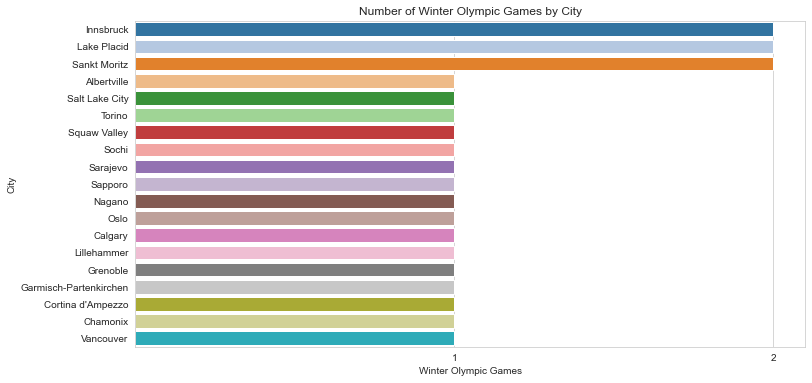

In [93]:
#Show the number of Winter 'Games' by 'City'
sns.set_style("whitegrid")
winter_games.reset_index(inplace=True)

plt.figure(figsize=(12, 6))  
sns.barplot(data=winter_games, x='Games', y='City', palette='tab20')

plt.xlabel('Winter Olympic Games')
plt.ylabel('City')
plt.title('Number of Winter Olympic Games by City')
plt.xticks([1, 2]) 


plt.show()

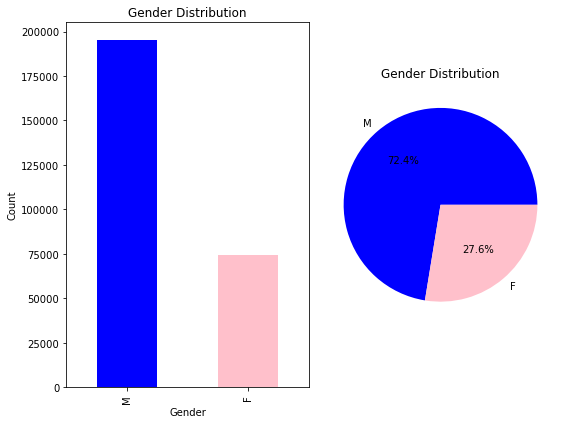

In [76]:
# Analyze gender distribution
gender_counts = df['Sex'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))

# Bar plot
plt.subplot(1, 2, 1)
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()


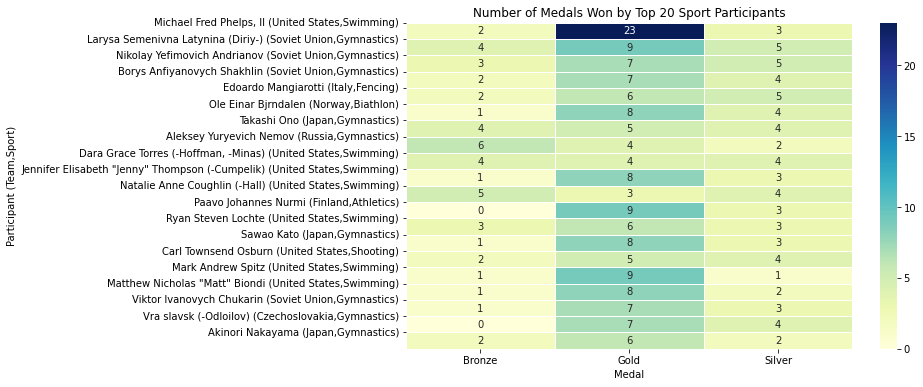

In [77]:
# Filter out 'unknown' values in the Medal column
df = df[df['Medal'] != 'unknown']

# Group the data by participant, country, and count the number of medals won by each participant
participant_medals_country = df.groupby(['Name', 'Team','Sport', 'Medal'])['Medal'].count().unstack(fill_value=0)

# Find the top 10 sport participants across all years
top_10_participants = participant_medals_country.sum(axis=1).nlargest(20)

# Filter the data to include only the top 10 participants
top_10_data = participant_medals_country.loc[top_10_participants.index]

# Get the participant names along with their team name as labels
participant_labels = [f"{name} ({team},{sport})" for name, team,sport in top_10_data.index]

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(top_10_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Number of Medals Won by Top 20 Sport Participants')
plt.xlabel('Medal')
plt.ylabel('Participant (Team,Sport)')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Bronze', 'Gold', 'Silver'])
plt.yticks(ticks=range(len(top_10_data)), labels=participant_labels, rotation=0)
plt.show()

Text(0.5, 1.0, 'Variation in number of Male Athletes over time')

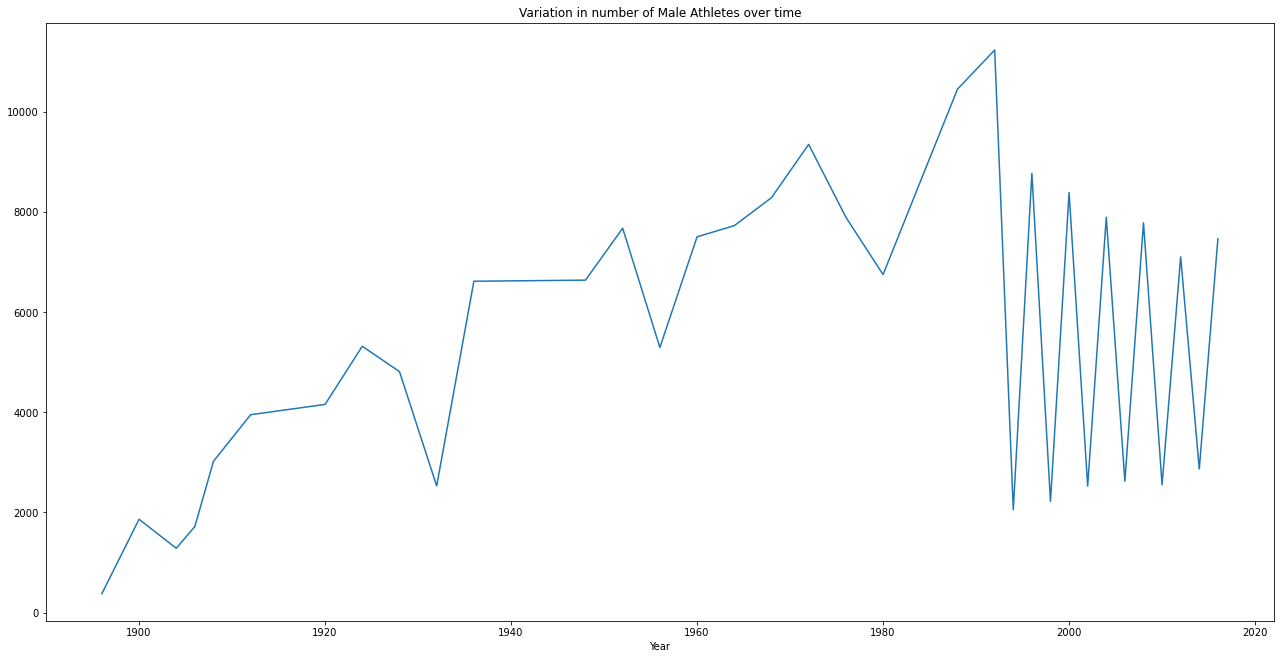

In [78]:
segment = men.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(22, 11))
segment.loc[:,'M'].plot()
plt.title('Variation in number of Male Athletes over time')

Text(0.5, 1.0, 'Variation in number of Female Athletes over time')

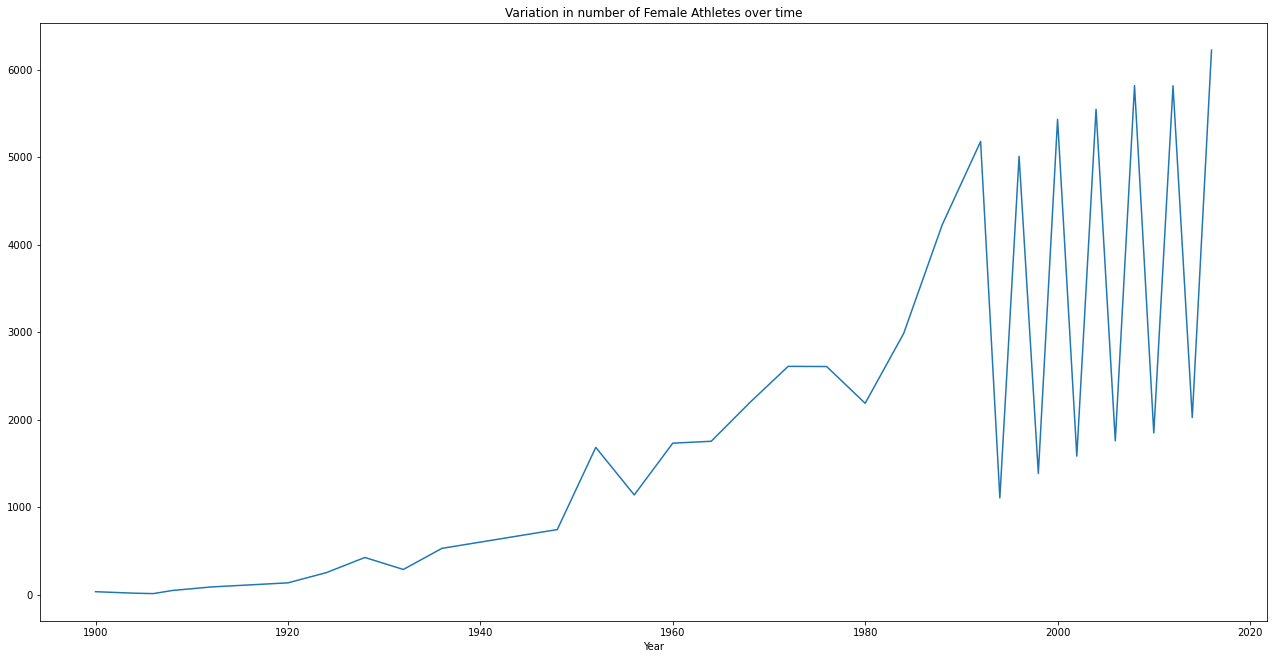

In [79]:
segment = women.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(22, 11))
segment.loc[:,'F'].plot()
plt.title('Variation in number of Female Athletes over time')

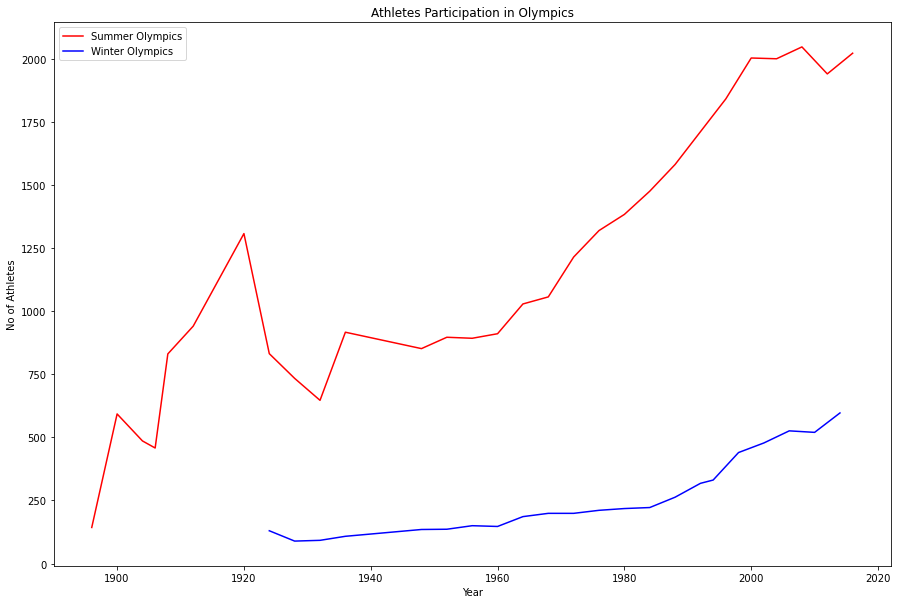

In [80]:
plt.figure(figsize=(15, 10))

ath_summer = df[df['Season'] == 'Summer'].groupby('Year')['ID'].count()
ath_winter = df[df['Season'] == 'Winter'].groupby('Year')['ID'].count()

plt.plot(ath_summer.index, ath_summer.values, label='Summer Olympics', color='red')
plt.plot(ath_winter.index, ath_winter.values, label='Winter Olympics', color='blue')

plt.xlabel('Year')
plt.ylabel('No of Athletes')
plt.legend()
plt.title('Athletes Participation in Olympics')
plt.show()

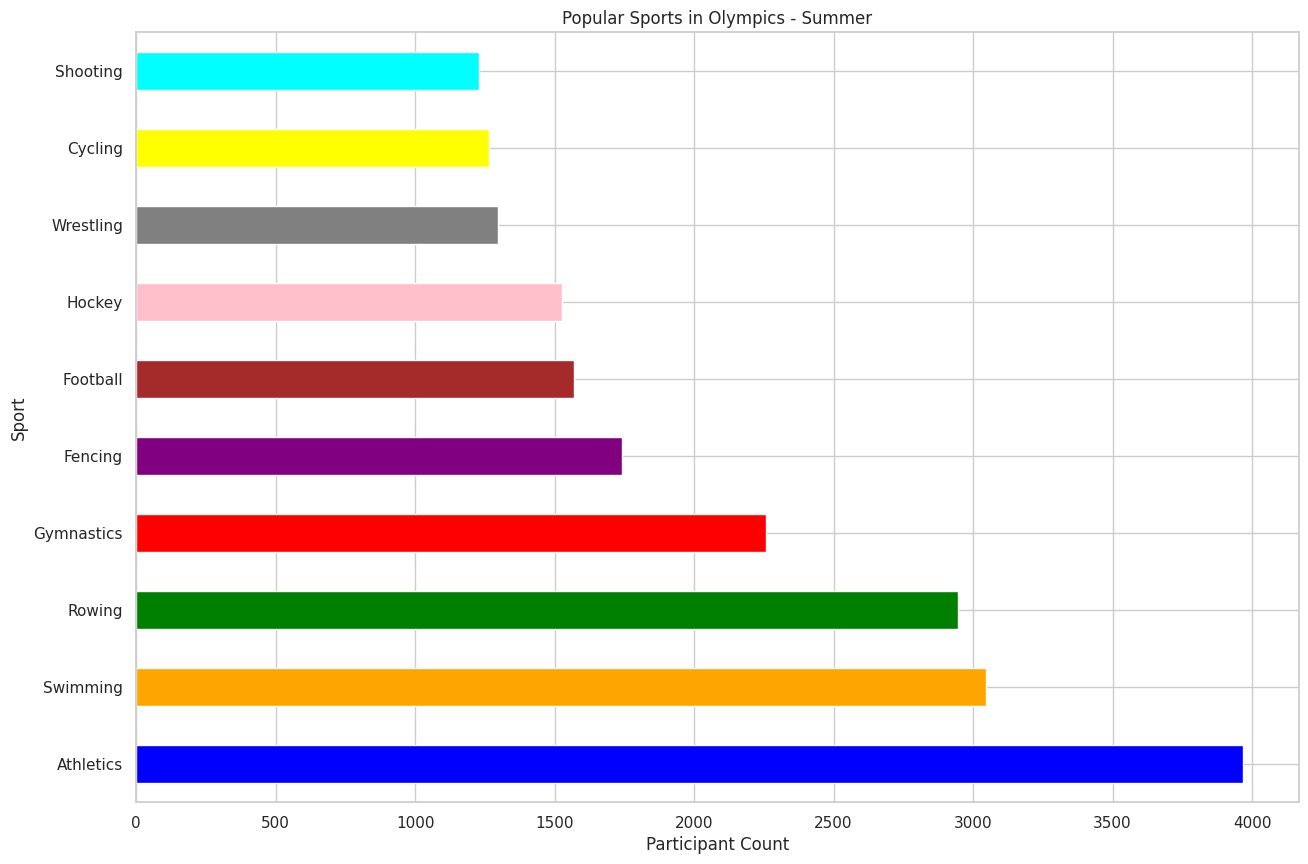

In [120]:
plt.figure(figsize=(15, 10))
tops=df[df['Season']=='Summer'].Sport.value_counts().head(n=10)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'yellow', 'cyan']
tops.plot(kind='barh',color=colors)
plt.xlabel("Participant Count")
plt.title('Popular Sports in Olympics - Summer')
plt.show()

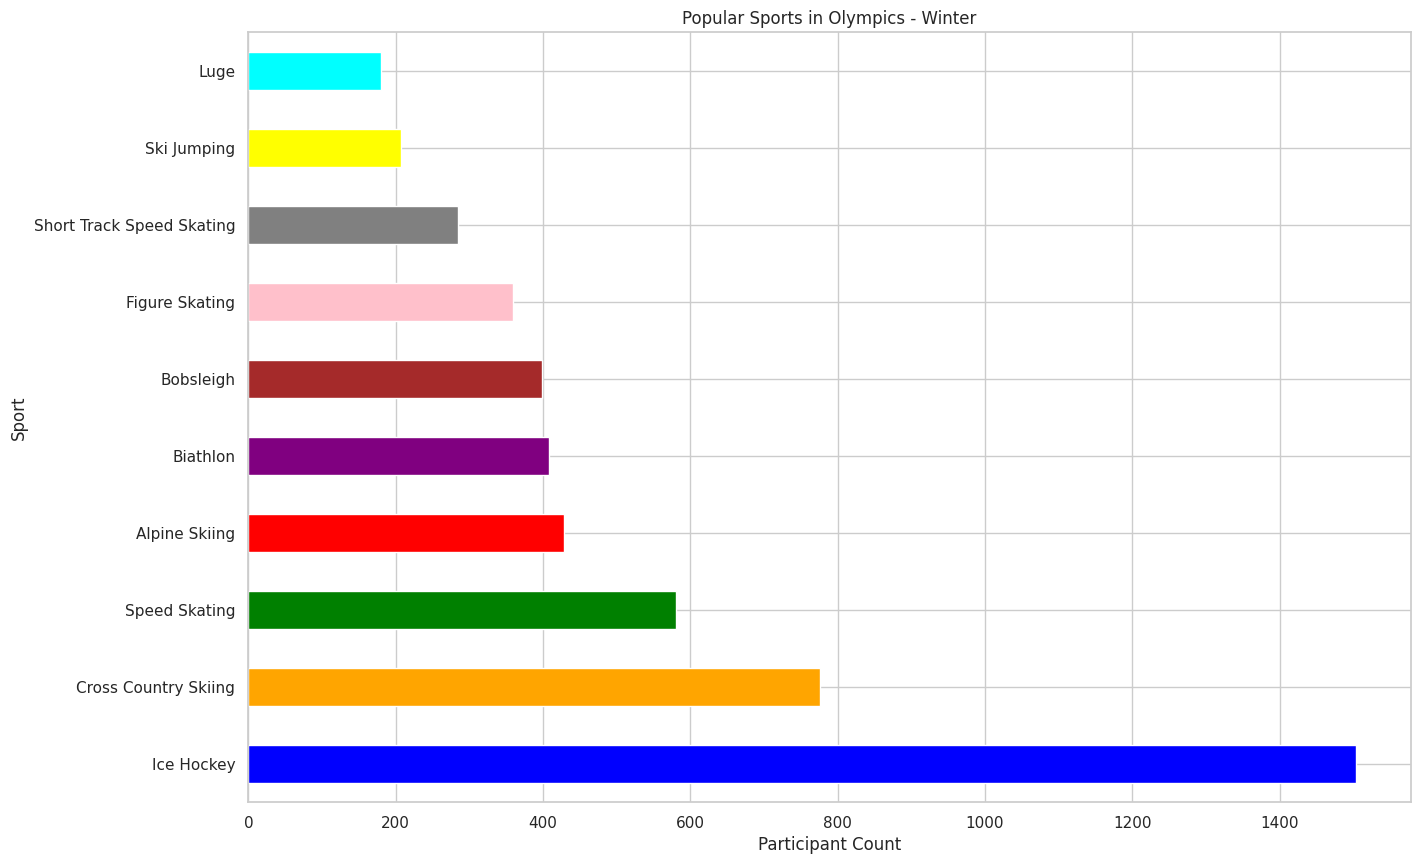

In [121]:
plt.figure(figsize=(15, 10))
tops=df[df['Season']=='Winter'].Sport.value_counts().head(n=10)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'yellow', 'cyan']
tops.plot(kind='barh', color=colors)
plt.xlabel("Participant Count")
plt.title('Popular Sports in Olympics - Winter')
plt.show()

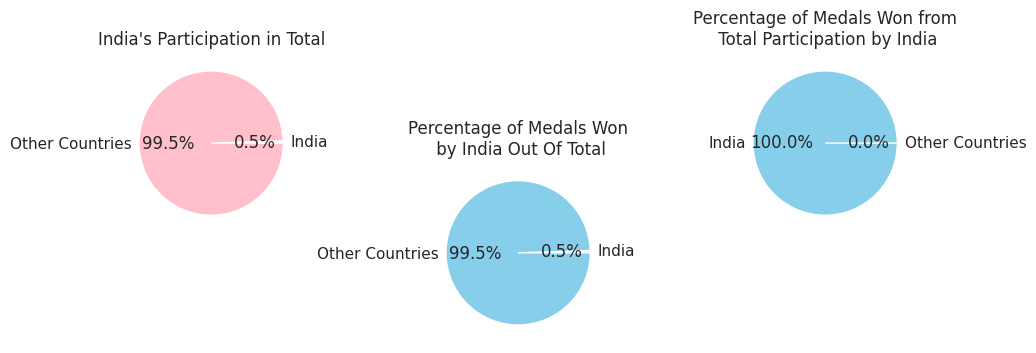

In [122]:
india_data = df[df['Team'] == 'India']
# Total participation by India
total_participation = len(india_data)

# Count of medals won by India
medals_won = india_data['Medal'].count()

# Total medals won by all countries
total_medals_all_countries = df[df['Medal'].notnull()]['Medal'].count()

# Create data for the pie chart
participation_data = [total_participation, len(df) - total_participation]
medals_data = [medals_won, total_medals_all_countries - medals_won]
labels = ['India', 'Other Countries']
medal_labels = ['India', 'Other Countries']

# Plot the pie chart for India's participation in total
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.pie(participation_data, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title("India's Participation in Total")

# Plot the pie chart for percentage of medals won by India
plt.subplot(1, 3, 2)
plt.pie(medals_data, labels=medal_labels, autopct='%1.1f%%', colors=['pink', 'skyblue'])
plt.title("Percentage of Medals Won\n by India Out Of Total")

medals_data = [medals_won, total_participation - medals_won]
# Plot the pie chart for percentage of medals won by India
plt.subplot(2, 3, 3)
plt.pie(medals_data, labels=medal_labels, autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title("Percentage of Medals Won from\n Total Participation by India")

plt.tight_layout()
plt.show()

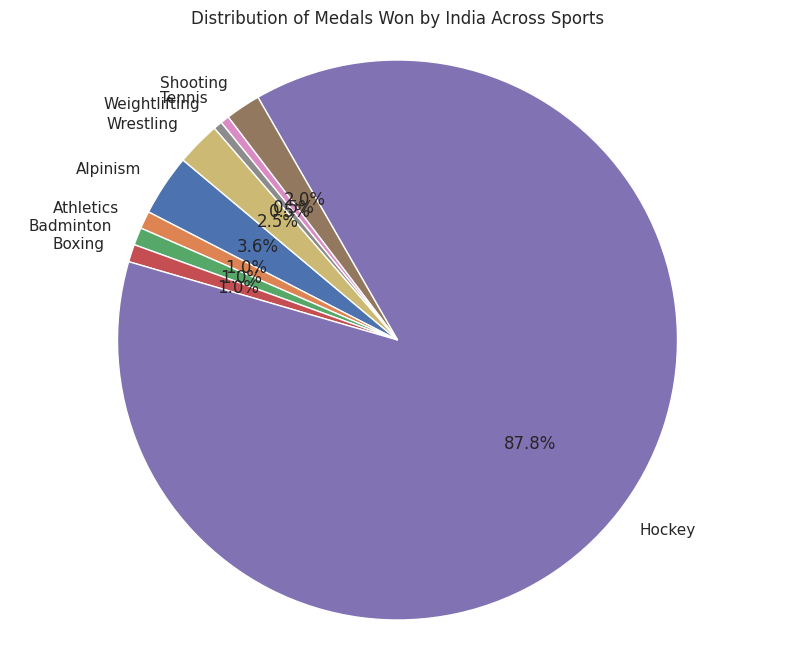

India won the maximum number of medals in Hockey sport.


In [123]:
# Filter data for India and non-null medals
india_data = df[(df['Team'] == 'India') & (df['Medal']!="unknown")]

# Group data by Sport and count the number of medals won in each sport
medals_by_sport = india_data.groupby('Sport')['Medal'].count()

# Find the sport with the maximum number of medals won by India
max_medals_sport = medals_by_sport.idxmax()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(medals_by_sport, labels=medals_by_sport.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Medals Won by India Across Sports')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(f"India won the maximum number of medals in {max_medals_sport} sport.")

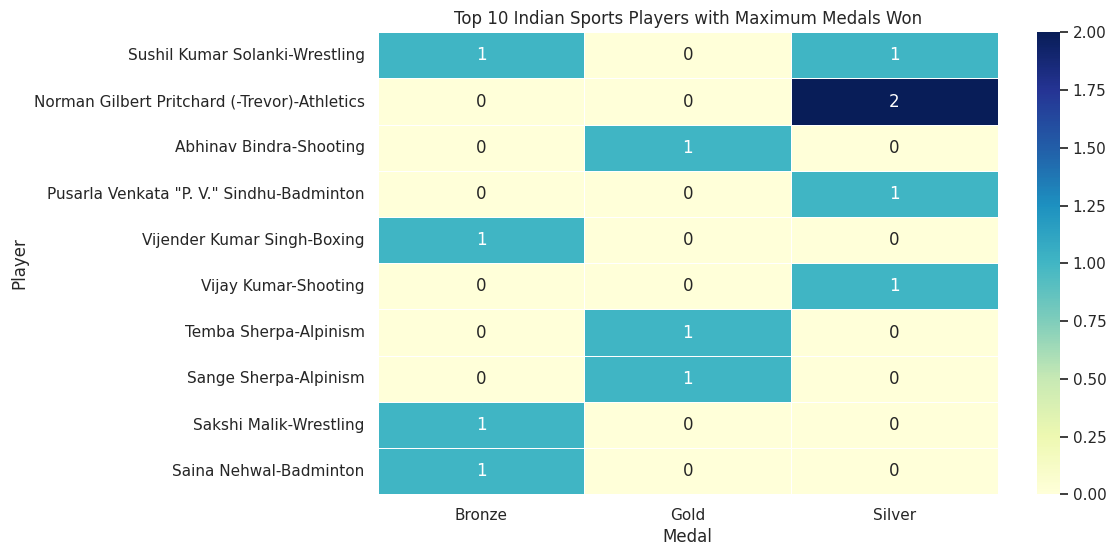

In [124]:
# Filter the dataset to include only Indian players and ignore the 'unknown' category
indian_players = df[(df['Team'] == 'India') & (df['Medal'] != 'unknown')& (df['Sport'] != 'Hockey')]

# Group the data by player and count the number of gold, silver, and bronze medals won by each player
indian_player_medals = indian_players.groupby(['Name','Sport','Medal']).size().unstack(fill_value=0)

# Calculate the total number of medals won by each player
indian_player_medals['Total'] = indian_player_medals.sum(axis=1)

# Sort the players based on the total number of medals won and select the top 15 players
top_15_players = indian_player_medals.sort_values(by='Total', ascending=False).head(10)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(top_15_players.drop('Total', axis=1), cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Top 10 Indian Sports Players with Maximum Medals Won')
plt.xlabel('Medal')
plt.ylabel('Player')
plt.show()

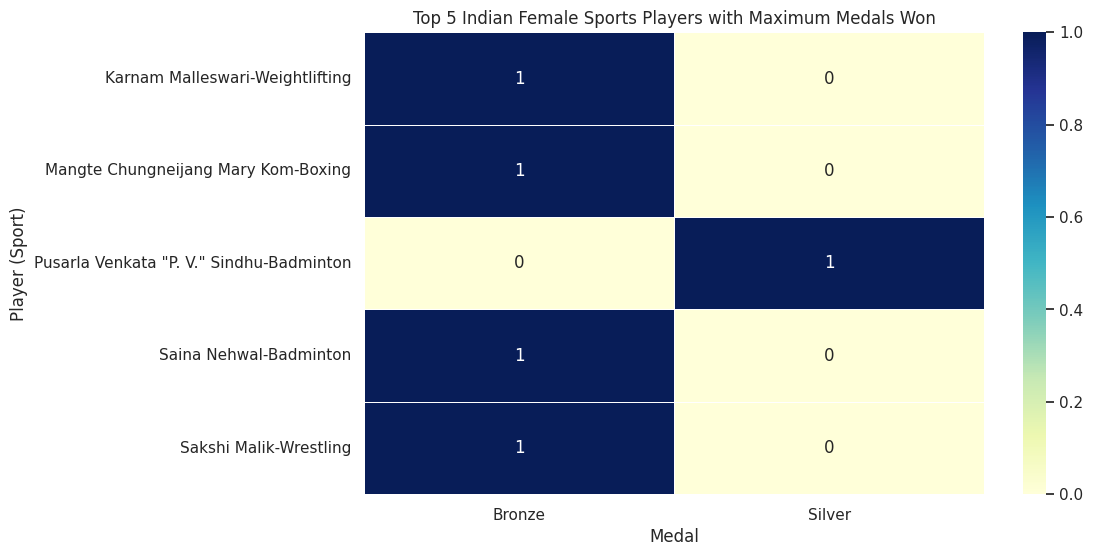

In [125]:
# Filter the dataset to include only Indian female players and ignore the 'unknown' category
indian_female_players = df[(df['Team'] == 'India') & (df['Medal'] != 'unknown') & (df['Sex'] == 'F')]

# Group the data by player and count the number of gold, silver, and bronze medals won by each player
indian_female_player_medals = indian_female_players.groupby(['Name', 'Sport', 'Medal']).size().unstack(fill_value=0)

# Calculate the total number of medals won by each player
indian_female_player_medals['Total'] = indian_female_player_medals.sum(axis=1)

# Sort the players based on the total number of medals won and select the top 15 players
top_15_female_players = indian_female_player_medals.sort_values(by='Total', ascending=False).head(15)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(top_15_female_players.drop('Total', axis=1), cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Top 5 Indian Female Sports Players with Maximum Medals Won')
plt.xlabel('Medal')
plt.ylabel('Player (Sport)')
plt.show()

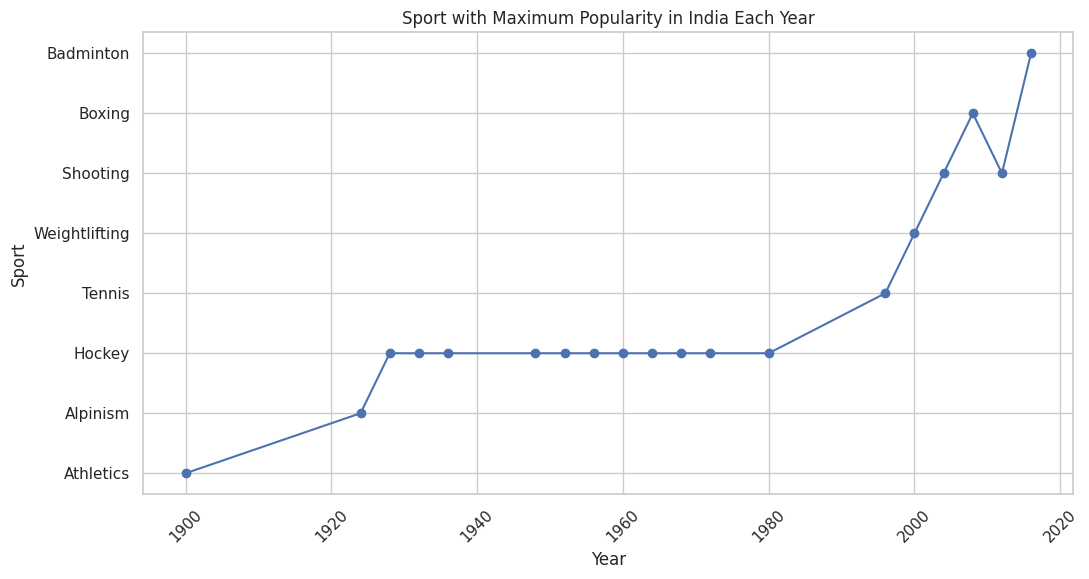

In [126]:
# Filter out 'unknown' values in the Medal column
df = df[df['Medal'] != 'unknown']

# Filter the data to include only Indian participants
indian_data = df[df['Team'] == 'India']

# Group the data by year and sport, and count the number of participants or medals won
sport_popularity_year = indian_data.groupby(['Year', 'Sport']).size()

# Find the sport with maximum popularity in each year
max_popular_sport_year = sport_popularity_year.groupby('Year').idxmax().apply(lambda x: x[1])

# Plot the sport with maximum popularity in India each year
plt.figure(figsize=(12, 6))
plt.plot(max_popular_sport_year.index, max_popular_sport_year.values, marker='o', linestyle='-')
plt.title('Sport with Maximum Popularity in India Each Year')
plt.xlabel('Year')
plt.ylabel('Sport')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()